In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

from sklearn.preprocessing import LabelEncoder, MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
df = pd.read_csv(r"C:\Users\HP\Downloads\project_docker\Bank_Deposite.csv")

In [4]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
# Get statistical analysis
df['age'].describe()

count    45211.000000
mean        40.936210
std         10.618762
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

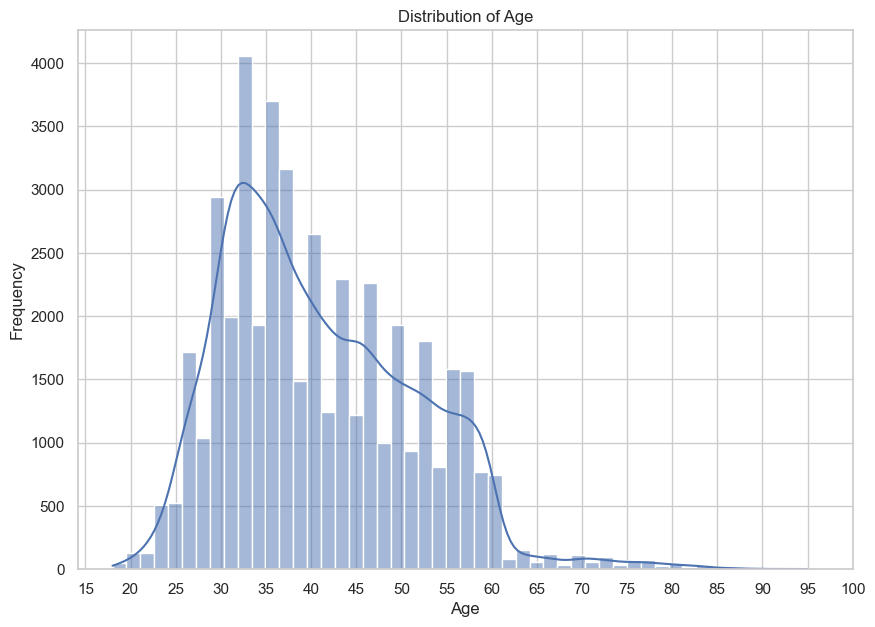

In [7]:
# Define figure size
plt.figure(figsize=(10, 7))

# Plot the histogram
ax = sns.histplot(df['age'], bins=50, kde=True, palette='viridis')

# Add labels and title
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.xticks([i for i in range(15, 105, 5)])


# Show the plot
plt.show()

In [8]:

df['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [9]:
df['job'] = df['job'].replace('unknown', 'others')
df['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
others            288
Name: job, dtype: int64

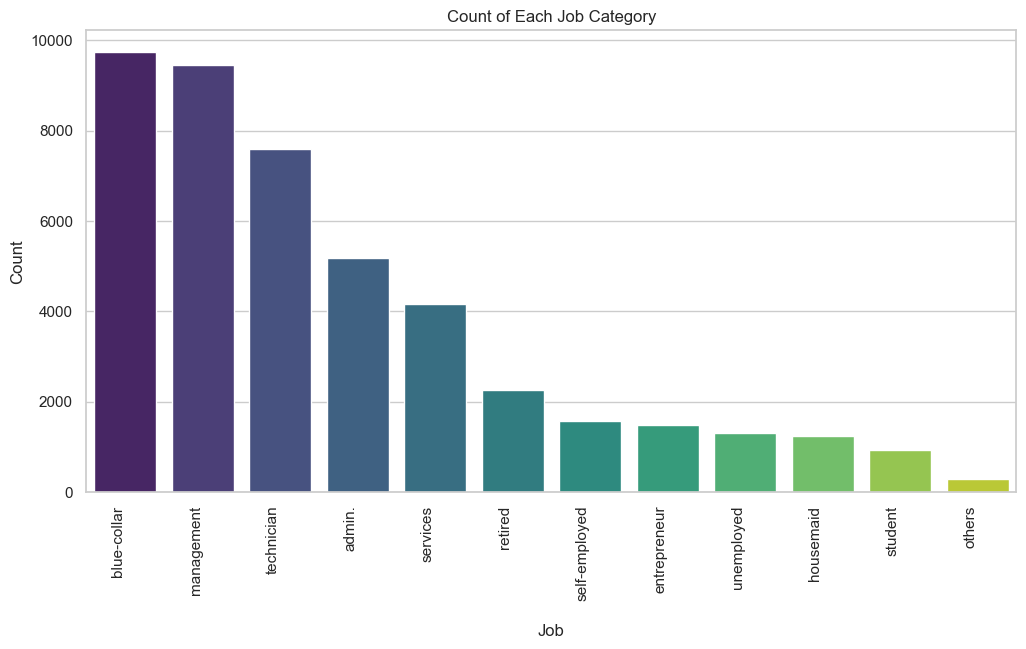

In [10]:
# Define counts
job_counts = df['job'].value_counts()

# Define figure size
plt.figure(figsize=(12, 6))

# Plot bar chart
sns.barplot(x=job_counts.index, y=job_counts.values, palette='viridis')

# Add labels and title
plt.title('Count of Each Job Category')
plt.xlabel('\nJob')
plt.ylabel('Count')
plt.xticks(rotation=90, ha='right')

# Show the plot
plt.show()


In [11]:
# Count the occurrences of each unique value in the 'marital' column
marital_counts = df['marital'].value_counts()

# Print the result
print(marital_counts)

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64


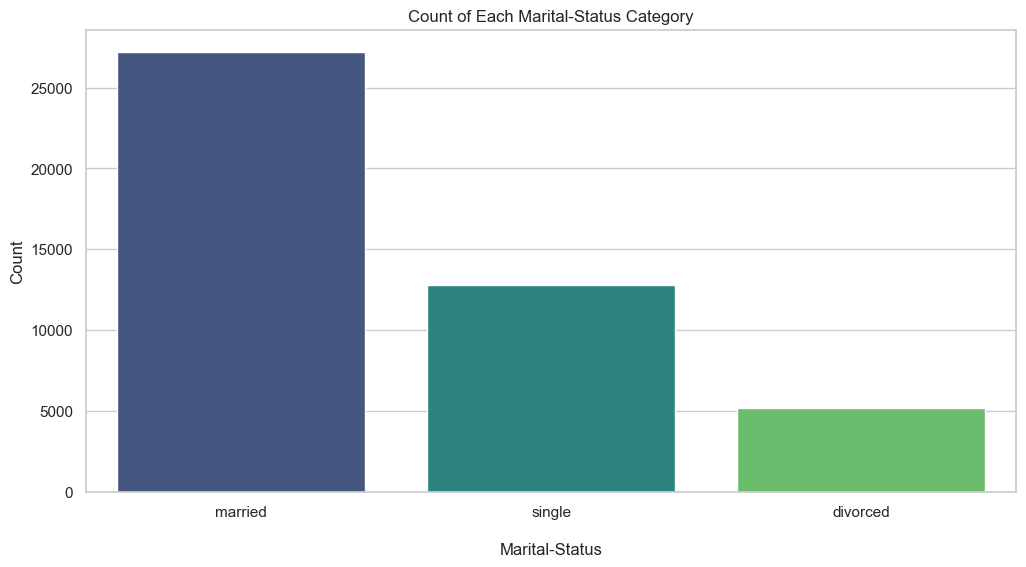

In [12]:
# Define counts
marital_counts = df['marital'].value_counts()

# Define figure size
plt.figure(figsize=(12, 6))

# Plot bar chart
sns.barplot(x=marital_counts.index, y=marital_counts.values, palette='viridis')

# Add labels and title
plt.title('Count of Each Marital-Status Category')
plt.xlabel('\nMarital-Status')
plt.ylabel('Count')

# Show the plot
plt.show()

In [13]:
# Count the occurrences of each unique value in the 'education' column
education_counts = df['education'].value_counts()

# Print the result
print(education_counts)

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64


In [14]:
# Replace 'unknown' with 'others' in the 'education' column
df['education'] = df['education'].replace('unknown', 'others')

# Count the occurrences of each unique value in the updated 'education' column
education_counts = df['education'].value_counts()

# Print the result
print(education_counts)

secondary    23202
tertiary     13301
primary       6851
others        1857
Name: education, dtype: int64


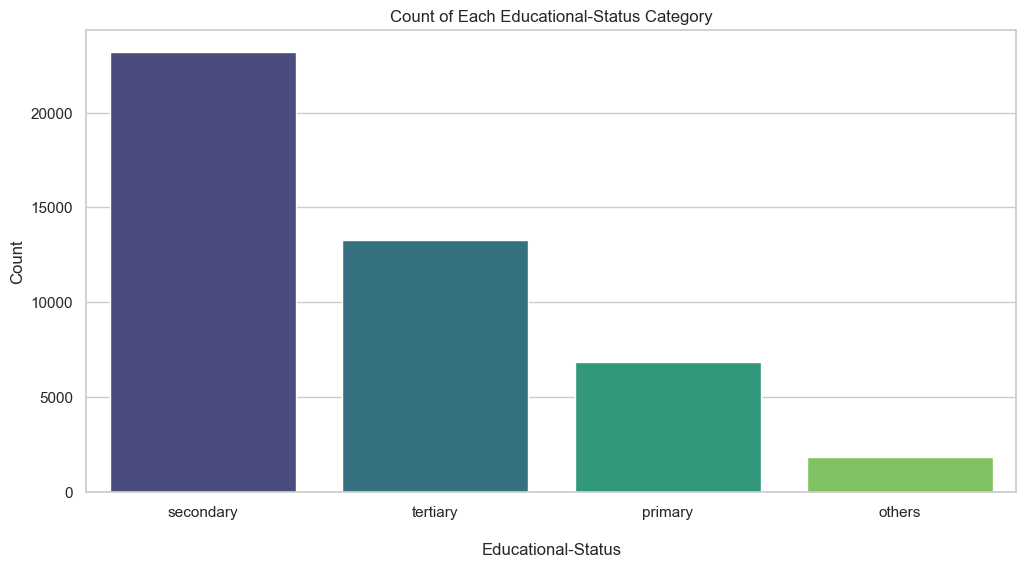

In [15]:
# Define Counts
education_counts = df['education'].value_counts()

# Define figure size
plt.figure(figsize=(12, 6))

# Plot bar chart
sns.barplot(x=education_counts.index, y=education_counts.values, palette='viridis')

# Add labels and title
plt.title('Count of Each Educational-Status Category')
plt.xlabel('\nEducational-Status')
plt.ylabel('Count')

# Show the plot
plt.show()

In [16]:
#Whether the customer has credit in default or not.
# Count the occurrences of each unique value in the 'default' column
default_counts = df['default'].value_counts()

# Print the result
print(default_counts)

no     44396
yes      815
Name: default, dtype: int64


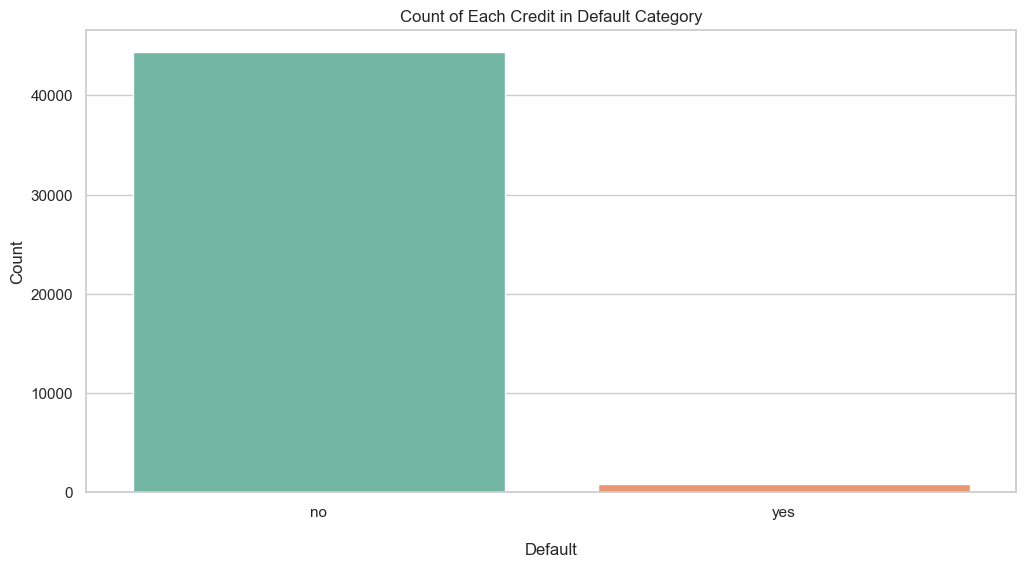

In [17]:
# Define counts
default_counts = df['default'].value_counts()

# Define figure size
plt.figure(figsize=(12, 6))

# Plot bar chart with a different color palette (e.g., 'Set2')
sns.barplot(x=default_counts.index, y=default_counts.values, palette='Set2')

# Add labels and title
plt.title('Count of Each Credit in Default Category')
plt.xlabel('\nDefault')
plt.ylabel('Count')

# Show the plot
plt.show()


In [18]:
# Drop the 'default' column from the DataFrame in-place
# the "no" values is so poor
df.drop(columns=['default'], inplace=True)

In [19]:
# Assuming train_df is your DataFrame
balance_stats = df['balance'].describe()

# Print the descriptive statistics
print(balance_stats)

count     45211.000000
mean       1362.272058
std        3044.765829
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64


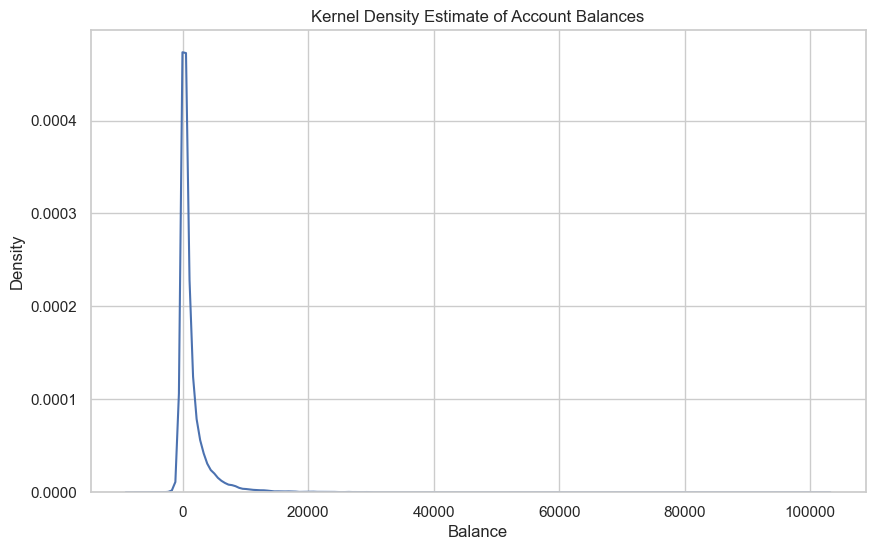

In [20]:
# Define figure size
plt.figure(figsize=(10, 6))

# Plot the histogram
sns.kdeplot(df['balance'], palette='viridis')

# Add labels and title
plt.title('Kernel Density Estimate of Account Balances')
plt.xlabel('Balance')
plt.ylabel('Density')

# Show the plot
plt.show()

In [21]:
# Count the number of records where the 'balance' is less than or equal to zero
balance_less_than_or_equal_to_zero_count = df[df['balance'] <= 0]['balance'].count()

# Print the result
print(f"Number of records with balance less than or equal to zero: {balance_less_than_or_equal_to_zero_count}")

Number of records with balance less than or equal to zero: 7280


In [22]:
# Define the percentile threshold
percentile_threshold = 95

# Calculate the specified percentile
percentile_value = int(np.percentile(df['balance'], percentile_threshold))

# Identify potential outliers
outliers = df[df['balance'] > percentile_value]

# Print the results
print(f'{percentile_threshold}th Percentile Value: {percentile_value}')
print(f'Number of Potential Outliers: {len(outliers)}')


95th Percentile Value: 5768
Number of Potential Outliers: 2260


In [23]:
# Filter rows in the 'train_df' DataFrame where 'balance' is less than or equal to 5768
df = df[df['balance'] <= 5768]

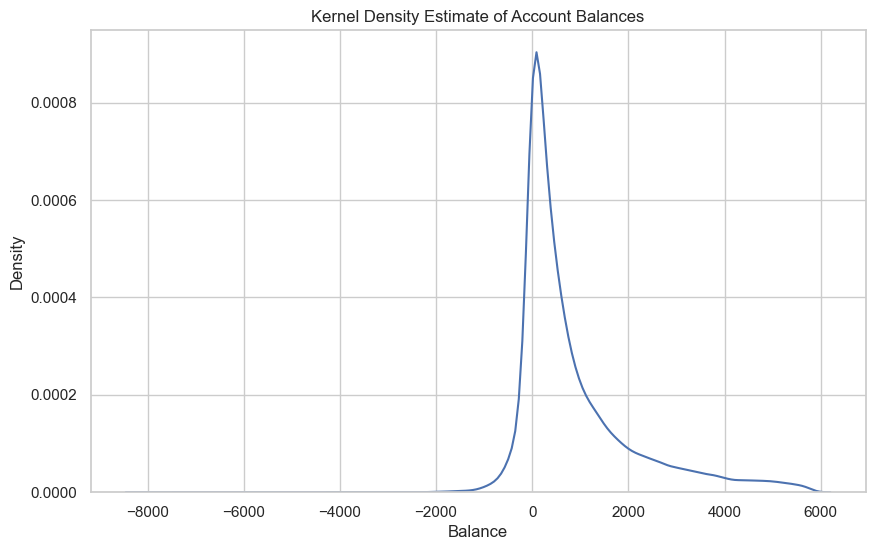

In [24]:
# Define figure size
plt.figure(figsize=(10, 6))

# Plot the histogram
sns.kdeplot(df['balance'], palette='viridis')

# Add labels and title
plt.title('Kernel Density Estimate of Account Balances')
plt.xlabel('Balance')
plt.ylabel('Density')

# Show the plot
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


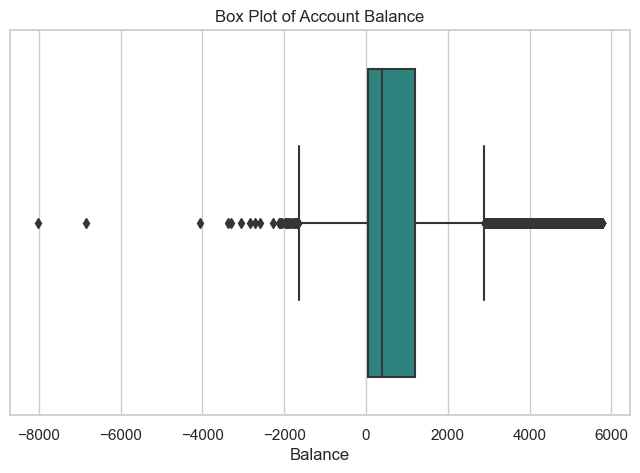

In [25]:
# Define figure size
plt.figure(figsize=(8, 5))

# Plot the boxplot
sns.boxplot(df['balance'], palette='viridis')

# Add labels and title
plt.title('Box Plot of Account Balance')
plt.xlabel('Balance')

# Show the plot
plt.show()

In [26]:
# Define the percentile threshold
percentile_threshold = 5

# Calculate the specified percentile
percentile_value = int(np.percentile(df['balance'], percentile_threshold))

# Identify potential outliers
outliers = df[df['balance'] < percentile_value]

print(f'{percentile_threshold}th Percentile Value: {percentile_value}')
print(f'Number of Potential Outliers: {len(outliers)}')

5th Percentile Value: -191
Number of Potential Outliers: 2142


In [27]:
df = df[df['balance'] > -191]

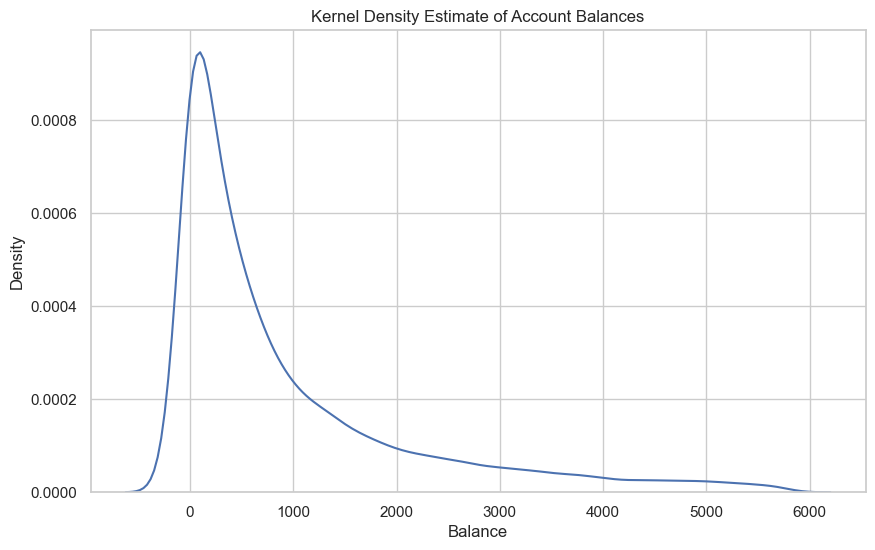

In [28]:
# Define figure size
plt.figure(figsize=(10, 6))

# Plot the histogram
sns.kdeplot(df['balance'], palette='viridis')

# Add labels and title
plt.title('Kernel Density Estimate of Account Balances')
plt.xlabel('Balance')
plt.ylabel('Density')

# Show the plot
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


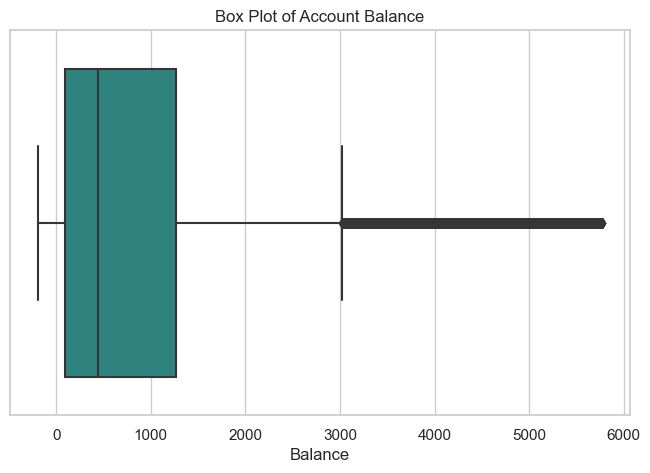

In [29]:
# Define figure size
plt.figure(figsize=(8, 5))

# Plot the boxplot
sns.boxplot(df['balance'], palette='viridis')

# Add labels and title
plt.title('Box Plot of Account Balance')
plt.xlabel('Balance')

# Show the plot
plt.show()

In [30]:
# Count occurrences of unique values in the 'housing' column
housing_counts = df['housing'].value_counts()

# Display the result
print(housing_counts)

yes    22448
no     18352
Name: housing, dtype: int64


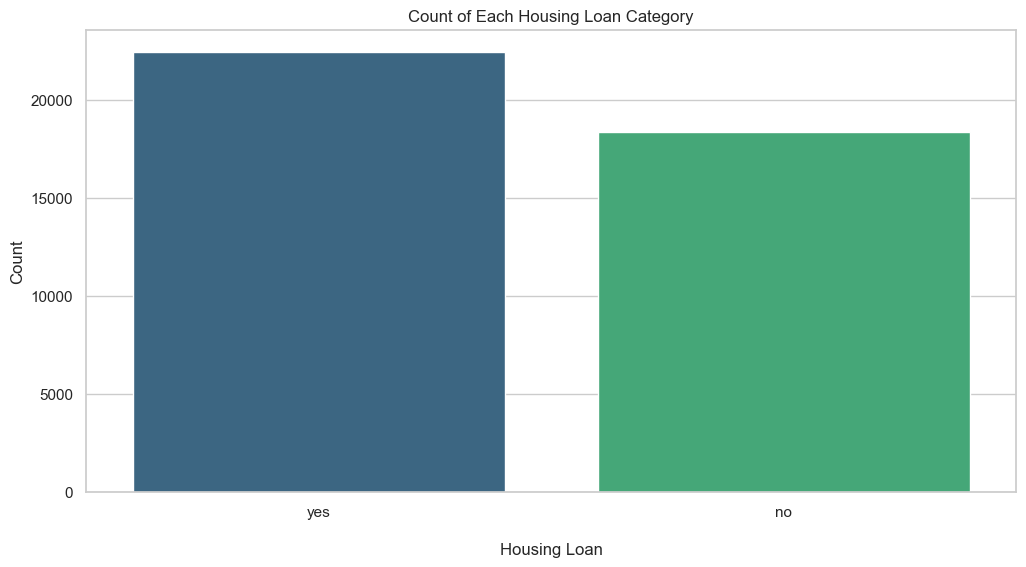

In [31]:
#Define counts
#Whether the customer has a housing loan or not.
housing_counts = df['housing'].value_counts()

# Define figure size
plt.figure(figsize=(12, 6))

# Plot bar chart
sns.barplot(x=housing_counts.index, y=housing_counts.values, palette='viridis')

# Add labels and title
plt.title('Count of Each Housing Loan Category')
plt.xlabel('\nHousing Loan')
plt.ylabel('Count')

# Show the plot
plt.show()

In [32]:
# Count occurrences of unique values in the 'loan' column
#Whether the customer has a loan or not.
loan_counts = df['loan'].value_counts()

# Display the result
print(loan_counts)


no     34462
yes     6338
Name: loan, dtype: int64


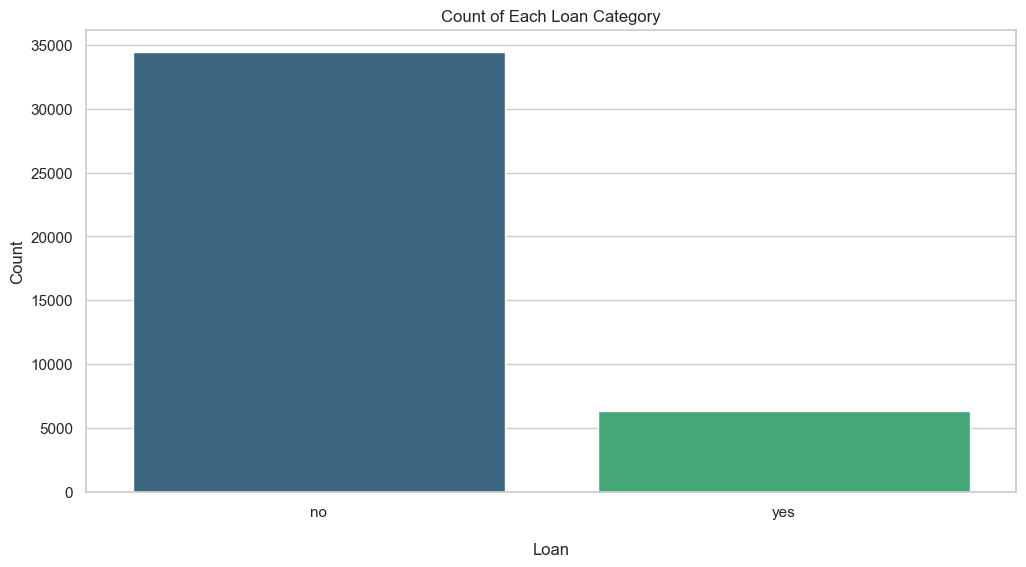

In [33]:
# Define counts
loan_counts = df['loan'].value_counts()

# Define figure size
plt.figure(figsize=(12, 6))

# Plot bar chart
sns.barplot(x=loan_counts.index, y=loan_counts.values, palette='viridis')

# Add labels and title
plt.title('Count of Each Loan Category')
plt.xlabel('\nLoan')
plt.ylabel('Count')

# Show the plot
plt.show()


In [34]:
#Type of communication used to contact customers

# Count occurrences of unique values in the 'contact' column
contact_counts = df['contact'].value_counts()

# Display the result
print(contact_counts)

cellular     26530
unknown      11625
telephone     2645
Name: contact, dtype: int64


In [35]:
# Replace 'unknown' with 'others' in the 'contact' column
df['contact'] = df['contact'].replace('unknown', 'others')

# Count occurrences of unique values in the 'contact' column
contact_counts = df['contact'].value_counts()

# Display the result
print(contact_counts)


cellular     26530
others       11625
telephone     2645
Name: contact, dtype: int64


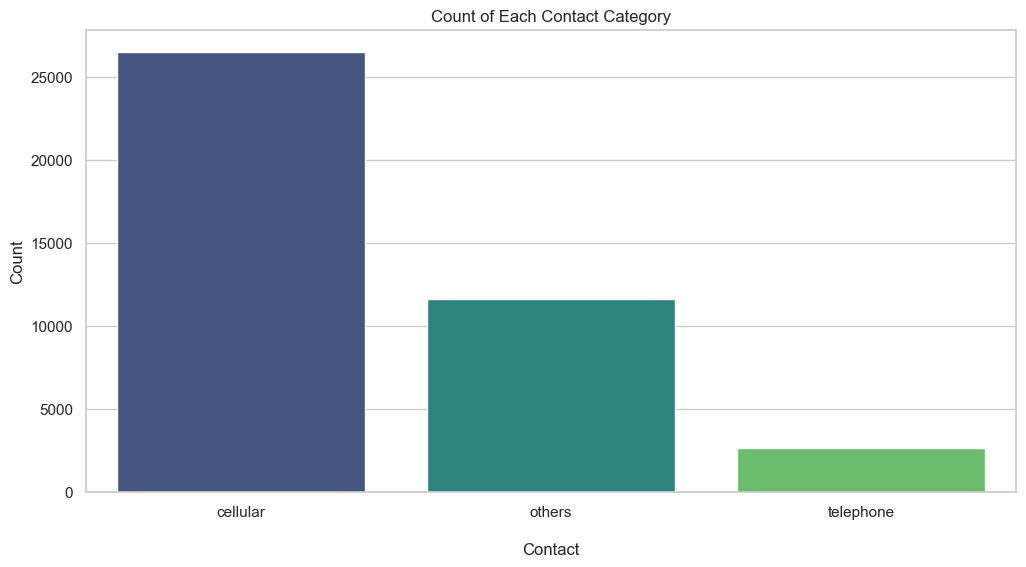

In [36]:
# Define counts
contact_counts = df['contact'].value_counts()

# Define figure size
plt.figure(figsize=(12, 6))

# Plot bar chart
sns.barplot(x=contact_counts.index, y=contact_counts.values, palette='viridis')

# Add labels and title
plt.title('Count of Each Contact Category')
plt.xlabel('\nContact')
plt.ylabel('Count')

# Show the plot
plt.show()

In [37]:
#Day of the month when customers were last contacted

# Count occurrences of unique values in the 'day' column
day_counts = df['day'].value_counts()

# Display the result
print(day_counts)

20    2425
18    2059
17    1789
5     1769
6     1768
21    1762
8     1702
14    1664
7     1654
28    1645
29    1597
19    1550
15    1533
12    1469
13    1445
9     1423
30    1422
11    1338
4     1322
16    1309
2     1173
27     960
3      959
26     892
22     832
23     816
25     768
31     573
10     474
24     417
1      291
Name: day, dtype: int64


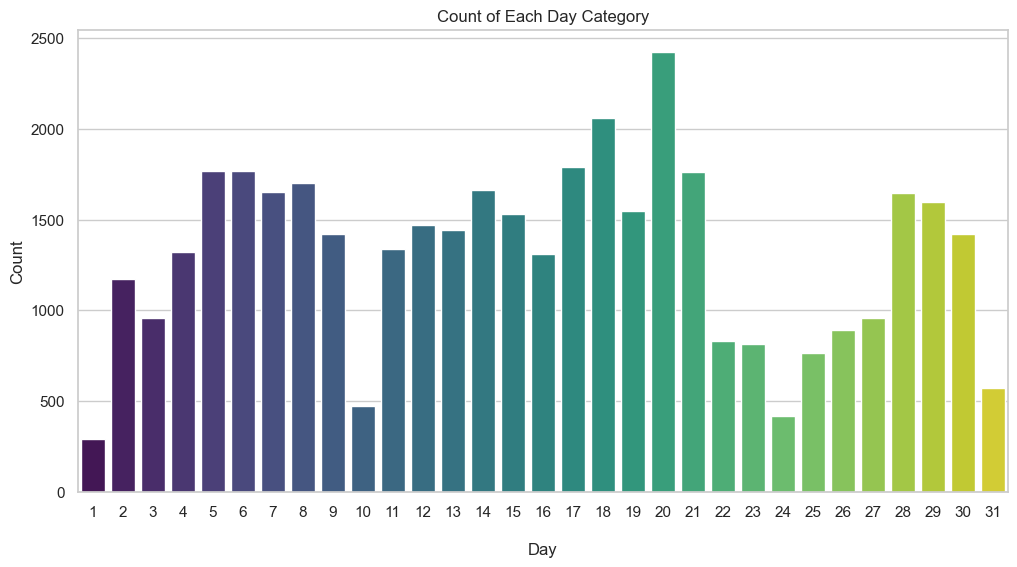

In [38]:
# Define counts
day_counts = df['day'].value_counts()

# Define figure size
plt.figure(figsize=(12, 6))

# Plot bar chart
sns.barplot(x=day_counts.index, y=day_counts.values, palette='viridis')

# Add labels and title
plt.title('Count of Each Day Category')
plt.xlabel('\nDay')
plt.ylabel('Count')

# Show the plot
plt.show()

In [39]:
#last contact month of year.
# Count occurrences of unique values in the 'month' column
month_counts = df['month'].value_counts()

# Display the result
print(month_counts)

may    12310
jul     6233
aug     5763
jun     4793
nov     3387
apr     2711
feb     2454
jan     1322
oct      668
sep      533
mar      430
dec      196
Name: month, dtype: int64


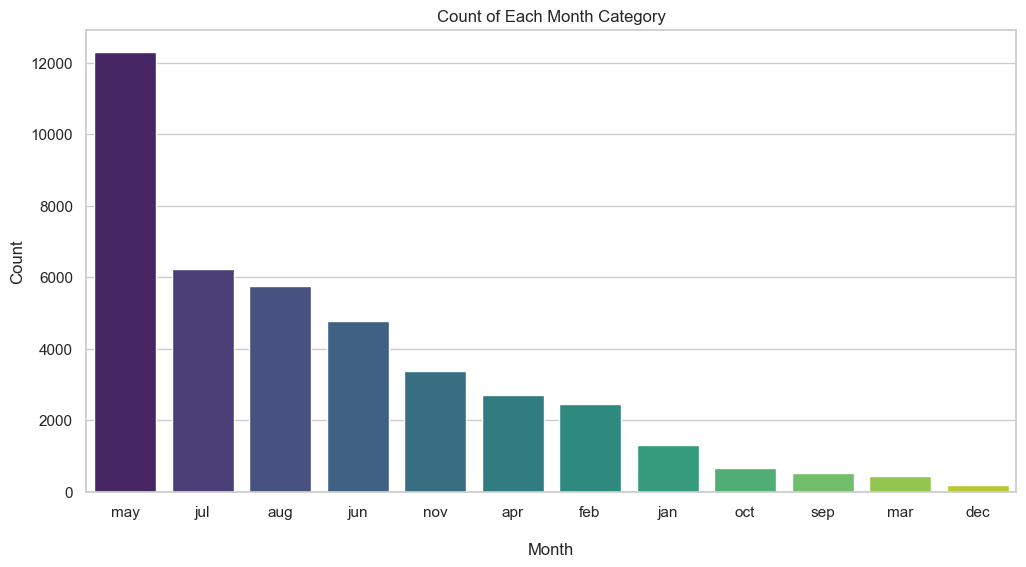

In [40]:
# Define counts
month_counts = df['month'].value_counts()

# Define figure size
plt.figure(figsize=(12, 6))

# Plot bar chart
sns.barplot(x=month_counts.index, y=month_counts.values, palette='viridis')

# Add labels and title
plt.title('Count of Each Month Category')
plt.xlabel('\nMonth')
plt.ylabel('Count')

# Show the plot
plt.show()

In [41]:
#last contact duration, in seconds

# Get descriptive statistics for the 'duration' column
duration_stats = df['duration'].describe()

# Display the result
print(duration_stats)

count    40800.000000
mean       257.625931
std        257.278864
min          0.000000
25%        103.000000
50%        180.000000
75%        318.000000
max       3881.000000
Name: duration, dtype: float64


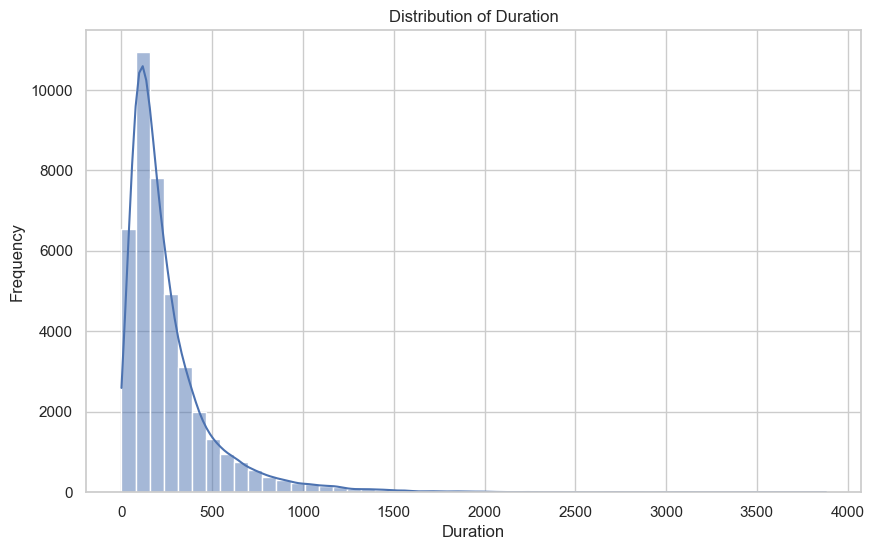

In [42]:
# Define figure size
plt.figure(figsize=(10, 6))

# Plot the histogram
ax = sns.histplot(df['duration'], bins=50, kde=True, palette='viridis')

# Add labels and title
plt.title('Distribution of Duration')
plt.xlabel('Duration')
plt.ylabel('Frequency')
# plt.xticks([i for i in range(15, 100, 5)])


# Show the plot
plt.show()

In [43]:
#number of contacts performed during this campaign and for this client
df['campaign'].describe()

count    40800.000000
mean         2.760490
std          3.079005
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         58.000000
Name: campaign, dtype: float64

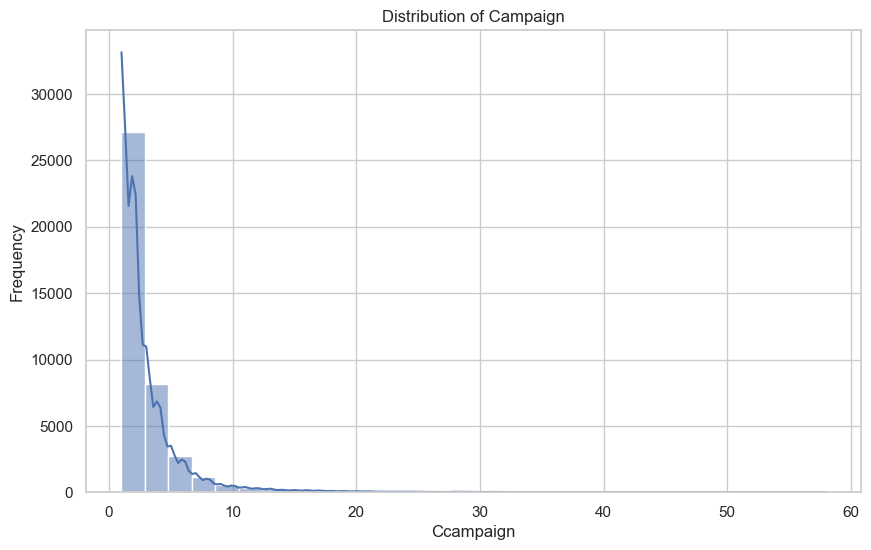

In [44]:
# Define figure size
plt.figure(figsize=(10, 6))

# Plot the histogram
ax = sns.histplot(df['campaign'], bins=30, kde=True, palette='viridis')

# Add labels and title
plt.title('Distribution of Campaign')
plt.xlabel('Ccampaign')
plt.ylabel('Frequency')
# plt.xticks([i for i in range(15, 100, 5)])


# Show the plot
plt.show()

In [45]:
#number of contacts performed before this campaign and for this client.
df['previous'].value_counts()

0      33306
1       2522
2       1896
3       1035
4        651
5        418
6        255
7        187
8        126
9         79
10        62
11        61
12        41
13        31
14        18
15        18
17        13
16        12
19        10
20         7
23         7
22         6
24         5
27         5
18         4
21         4
29         3
25         3
38         2
37         2
30         2
51         1
275        1
26         1
58         1
28         1
32         1
40         1
55         1
41         1
Name: previous, dtype: int64

In [46]:
df.drop(columns=['previous'], inplace=True)



In [47]:
#outcome of the previous marketing campaign
df['poutcome'].value_counts()

unknown    33311
failure     4405
other       1678
success     1406
Name: poutcome, dtype: int64

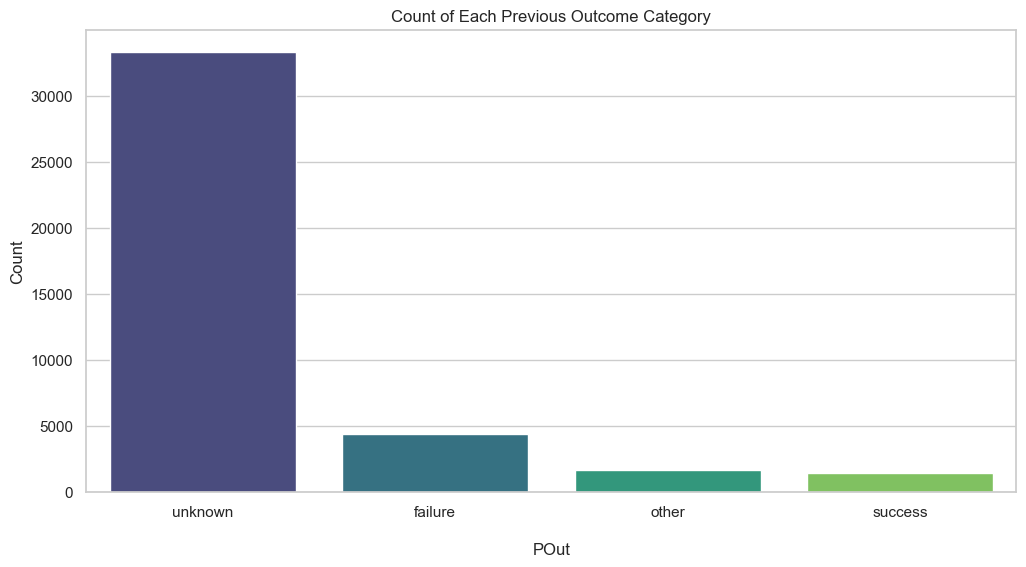

In [48]:
# Define counts
pout_counts = df['poutcome'].value_counts()

# Define figure size
plt.figure(figsize=(12, 6))

# Plot bar chart
sns.barplot(x=pout_counts.index, y=pout_counts.values, palette='viridis')

# Add labels and title
plt.title('Count of Each Previous Outcome Category')
plt.xlabel('\nPOut')
plt.ylabel('Count')

# Show the plot
plt.show()


In [49]:
df.drop(columns=['poutcome'], inplace=True)

In [50]:
#has the client subscribed a term deposit
df['y'].value_counts()

no     35971
yes     4829
Name: y, dtype: int64

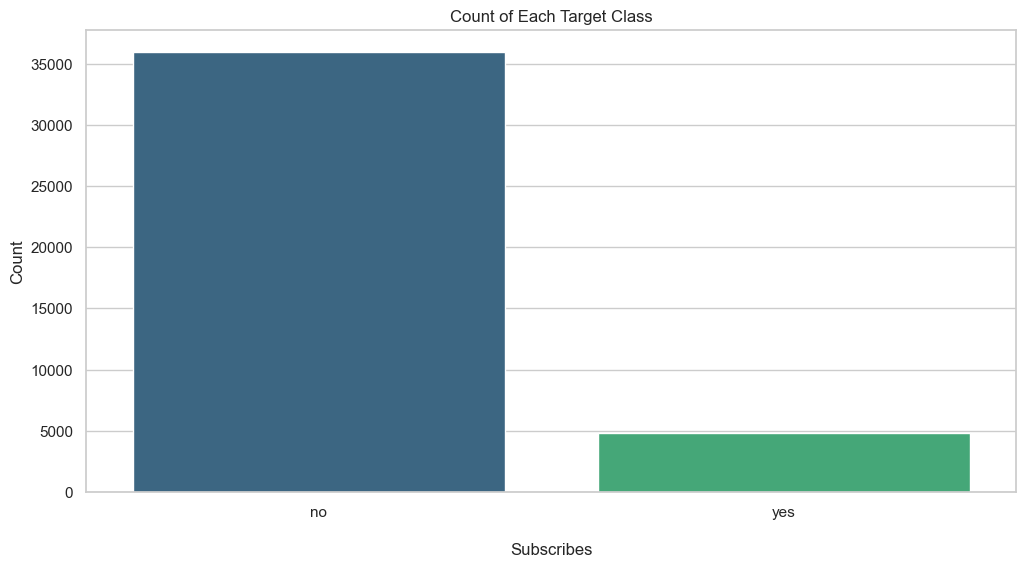

In [51]:
# Define counts
target_counts = df['y'].value_counts()

# Define figure size
plt.figure(figsize=(12, 6))

# Plot bar chart
sns.barplot(x=target_counts.index, y=target_counts.values, palette='viridis')

# Add labels and title
plt.title('Count of Each Target Class')
plt.xlabel('\nSubscribes')
plt.ylabel('Count')

# Show the plot
plt.show()


In [52]:
df

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,y
0,58,management,married,tertiary,2143,yes,no,others,5,may,261,1,-1,no
1,44,technician,single,secondary,29,yes,no,others,5,may,151,1,-1,no
2,33,entrepreneur,married,secondary,2,yes,yes,others,5,may,76,1,-1,no
3,47,blue-collar,married,others,1506,yes,no,others,5,may,92,1,-1,no
4,33,others,single,others,1,no,no,others,5,may,198,1,-1,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,825,no,no,cellular,17,nov,977,3,-1,yes
45207,71,retired,divorced,primary,1729,no,no,cellular,17,nov,456,2,-1,yes
45208,72,retired,married,secondary,5715,no,no,cellular,17,nov,1127,5,184,yes
45209,57,blue-collar,married,secondary,668,no,no,telephone,17,nov,508,4,-1,no


In [54]:
#Create a Label Encoder model to convert the categorical values into numeric
df = df.apply(LabelEncoder().fit_transform)

In [55]:
df

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,y
0,40,4,1,3,2310,1,0,1,4,8,261,0,0,0
1,26,10,2,2,219,1,0,1,4,8,151,0,0,0
2,15,2,1,2,192,1,1,1,4,8,76,0,0,0
3,29,1,1,0,1694,1,0,1,4,8,92,0,0,0
4,15,5,2,0,191,0,0,1,4,8,198,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,33,10,1,3,1015,0,0,0,16,9,972,2,0,1
45207,53,6,0,1,1913,0,0,0,16,9,456,1,0,1
45208,54,6,1,2,4729,0,0,0,16,9,1109,4,181,1
45209,39,1,1,2,858,0,0,2,16,9,508,3,0,0


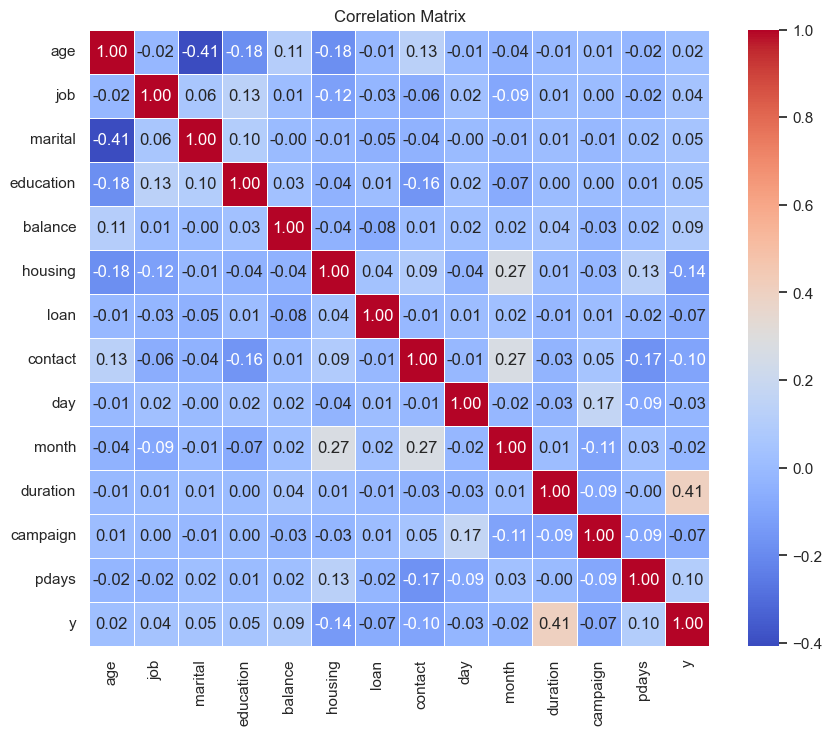

In [56]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [57]:
df

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,y
0,40,4,1,3,2310,1,0,1,4,8,261,0,0,0
1,26,10,2,2,219,1,0,1,4,8,151,0,0,0
2,15,2,1,2,192,1,1,1,4,8,76,0,0,0
3,29,1,1,0,1694,1,0,1,4,8,92,0,0,0
4,15,5,2,0,191,0,0,1,4,8,198,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,33,10,1,3,1015,0,0,0,16,9,972,2,0,1
45207,53,6,0,1,1913,0,0,0,16,9,456,1,0,1
45208,54,6,1,2,4729,0,0,0,16,9,1109,4,181,1
45209,39,1,1,2,858,0,0,2,16,9,508,3,0,0


### define feature selection

In [58]:

from sklearn.ensemble import RandomForestClassifier

# Select features and target variable
selected_columns = ['age', 'job', 'marital', 'education', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays']
features = df[selected_columns]
target = df['y']

# Initialize Random Forest Classifier
rf = RandomForestClassifier()

# Fit the model
rf.fit(features, target)

# Get feature importances
feature_importances = rf.feature_importances_

# Match feature importances with column names
feature_importance_dict = dict(zip(features.columns, feature_importances))

# Sort features by importance
sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Print sorted features
print("Feature Importances:")
for feature, importance in sorted_features:
    print(f"{feature}: {importance}")


Feature Importances:
duration: 0.2950718594355066
balance: 0.11581156455780095
age: 0.11251885521204148
month: 0.09733280269042807
day: 0.09653756608227711
pdays: 0.08055174803927868
job: 0.05166637806648669
campaign: 0.04113554986700364
education: 0.029427041285717707
housing: 0.027143772768899316
marital: 0.02292443262502968
contact: 0.018676190958579603
loan: 0.011202238410950366


In [59]:
df

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,y
0,40,4,1,3,2310,1,0,1,4,8,261,0,0,0
1,26,10,2,2,219,1,0,1,4,8,151,0,0,0
2,15,2,1,2,192,1,1,1,4,8,76,0,0,0
3,29,1,1,0,1694,1,0,1,4,8,92,0,0,0
4,15,5,2,0,191,0,0,1,4,8,198,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,33,10,1,3,1015,0,0,0,16,9,972,2,0,1
45207,53,6,0,1,1913,0,0,0,16,9,456,1,0,1
45208,54,6,1,2,4729,0,0,0,16,9,1109,4,181,1
45209,39,1,1,2,858,0,0,2,16,9,508,3,0,0


In [80]:
df.to_csv('Bank_Deposite_Model.csv', index=False)

### Define Features X and Target y

In [62]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [63]:
# Split the data into training and testing sets (80:20 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Machine Learning Algorithms

### 1- Logistic Regression

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize and train the Logistic Regression model
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

# Predict using the test data
y_pred_lr = lr.predict(X_test)

# Evaluate the model accuracy
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f'Accuracy (Logistic Regression): {accuracy_lr * 100:.2f} %')

# Print the classification report
print('\nClassification Report:\n', classification_report(y_test, y_pred_lr))

# Print the confusion matrix
print('\nConfusion Matrix:\n', confusion_matrix(y_test, y_pred_lr))


Accuracy (Logistic Regression): 88.80 %

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94      7188
           1       0.57      0.24      0.34       972

    accuracy                           0.89      8160
   macro avg       0.74      0.61      0.64      8160
weighted avg       0.86      0.89      0.87      8160


Confusion Matrix:
 [[7013  175]
 [ 739  233]]


C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 2-K-Nearest Neighbor

In [65]:
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors (k) as needed

# Train the model
knn.fit(X_train, y_train)
# Predict using the test data
y_pred = knn.predict(X_test)

# Evaluate the model accuracy
accuracy= accuracy_score(y_test, y_pred)
print(f'Accuracy (K-Nearest Neighbor): {accuracy * 100:.2f} %')

# Print the classification report
print('\nClassification Report:\n', classification_report(y_test, y_pred))

# Print the confusion matrix
print('\nConfusion Matrix:\n', confusion_matrix(y_test, y_pred))


Accuracy (K-Nearest Neighbor): 88.27 %

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.96      0.94      7188
           1       0.51      0.28      0.36       972

    accuracy                           0.88      8160
   macro avg       0.71      0.62      0.65      8160
weighted avg       0.86      0.88      0.87      8160


Confusion Matrix:
 [[6928  260]
 [ 697  275]]


### 3-Decision Tree Classifier

In [66]:
# Decision Tree model
clf = DecisionTreeClassifier(random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Predict using the test data
y_pred = clf.predict(X_test)


# Evaluate the model accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy (Decision Tree Classifier): {accuracy * 100:.2f} %')

# Print the classification report
print('\nClassification Report:\n', classification_report(y_test, y_pred))

# Print the confusion matrix
print('\nConfusion Matrix:\n', confusion_matrix(y_test, y_pred))


Accuracy (Decision Tree Classifier): 87.03 %

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.92      0.93      7188
           1       0.46      0.47      0.46       972

    accuracy                           0.87      8160
   macro avg       0.69      0.70      0.69      8160
weighted avg       0.87      0.87      0.87      8160


Confusion Matrix:
 [[6648  540]
 [ 518  454]]


### 4- Random Forest Classifier

In [77]:
from sklearn.ensemble import RandomForestClassifier
# Random Forest model
RF_clf = RandomForestClassifier(n_estimators=1000, random_state=42)

# Train the model
RF_clf.fit(X_train, y_train)
# Predict using the test data
y_pred = RF_clf.predict(X_test)

# Evaluate the model accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy (Random Forest Classifier): {accuracy * 100:.2f} %')

# Print the classification report
print('\nClassification Report:\n', classification_report(y_test, y_pred))

# Print the confusion matrix
print('\nConfusion Matrix:\n', confusion_matrix(y_test, y_pred))


Accuracy (Random Forest Classifier): 90.16 %

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.95      7188
           1       0.64      0.40      0.49       972

    accuracy                           0.90      8160
   macro avg       0.78      0.68      0.72      8160
weighted avg       0.89      0.90      0.89      8160


Confusion Matrix:
 [[6973  215]
 [ 588  384]]


### 4-linear_svc_classifier

In [76]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize and train the Linear Support Vector Machine (SVM) classifier
linear_svc_classifier = LinearSVC()
linear_svc_classifier.fit(X_train, y_train)

# Predict using the test data
y_pred_linear_svc = linear_svc_classifier.predict(X_test)

# Evaluate the model accuracy
accuracy_linear_svc = accuracy_score(y_test, y_pred_linear_svc)
print(f'Accuracy (Linear SVM): {accuracy_linear_svc * 100:.2f} %')

# Print the classification report
print('\nClassification Report (Linear SVM):\n', classification_report(y_test, y_pred_linear_svc))

# Print the confusion matrix
print('\nConfusion Matrix (Linear SVM):\n', confusion_matrix(y_test, y_pred_linear_svc))


Accuracy (Linear SVM): 88.81 %

Classification Report (Linear SVM):
               precision    recall  f1-score   support

           0       0.89      0.99      0.94      7188
           1       0.65      0.13      0.22       972

    accuracy                           0.89      8160
   macro avg       0.77      0.56      0.58      8160
weighted avg       0.86      0.89      0.85      8160


Confusion Matrix (Linear SVM):
 [[7116   72]
 [ 841  131]]


C:\Users\HP\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


### 5-xgbooost

In [71]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize and train the XGBoost Classifier
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train, y_train)

# Predict using the test data
y_pred_xgb = xgb_classifier.predict(X_test)

# Evaluate the model accuracy
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f'Accuracy (XGBoost): {accuracy_xgb * 100:.2f} %')

# Print the classification report
print('\nClassification Report (XGBoost):\n', classification_report(y_test, y_pred_xgb))

# Print the confusion matrix
print('\nConfusion Matrix (XGBoost):\n', confusion_matrix(y_test, y_pred_xgb))


Accuracy (XGBoost): 90.00 %

Classification Report (XGBoost):
               precision    recall  f1-score   support

           0       0.93      0.96      0.94      7188
           1       0.60      0.47      0.53       972

    accuracy                           0.90      8160
   macro avg       0.77      0.71      0.74      8160
weighted avg       0.89      0.90      0.89      8160


Confusion Matrix (XGBoost):
 [[6891  297]
 [ 519  453]]
